
# ➡️ **LAB01:** develop multi-layered perceptrons, activation functions, and loss functions from scratch

In this computer assignment, you will:
- Implement common **activation functions** from scratch.
- **Visualize** their behavior.
- Develop a simple **Multi-Layer Perceptron (MLP)**.
- Choose and implement the appropriate loss function.
- Train the MLP to solve the **XOR problem**.

In [ ]:
import platform
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from utils.lab01 import *
%matplotlib inline

## check whether we are working on MAC or else (Windows, Linux)
if platform.system() == "Darwin":
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda



## ✍️ Task 1: Implement activation functions

Complete the formulas for **Sigmoid**, **Tanh**, **ReLU**, and **Leaky ReLU** below.


In [2]:
def sigmoid(x):
    # TODO: Implement the Sigmoid function
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    # TODO: Implement the Tanh function
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

def relu(x):
    # TODO: Implement the ReLU function
    return torch.maximum(torch.tensor(0.0), x)

def leaky_relu(x, alpha=0.01):
    # TODO: Implement the Leaky ReLU function
    return torch.where(x > 0, x, alpha * x)

def elu(x, alpha=0.01):
    # TODO: Implement the ELU function
    return torch.where(x > 0, x, alpha * (torch.exp(x)-1))

In [3]:
activations = {
        "Sigmoid": sigmoid,
        "Tanh": tanh,
        "ReLU": relu,
        "Leaky ReLU": lambda x: leaky_relu(x, alpha=0.1),
        "ELU": lambda x: elu(x, alpha=1.0),
    }


## 📊 Task 2: Visualize activation functions

Use the helper function below to visualize the implemented activation functions.


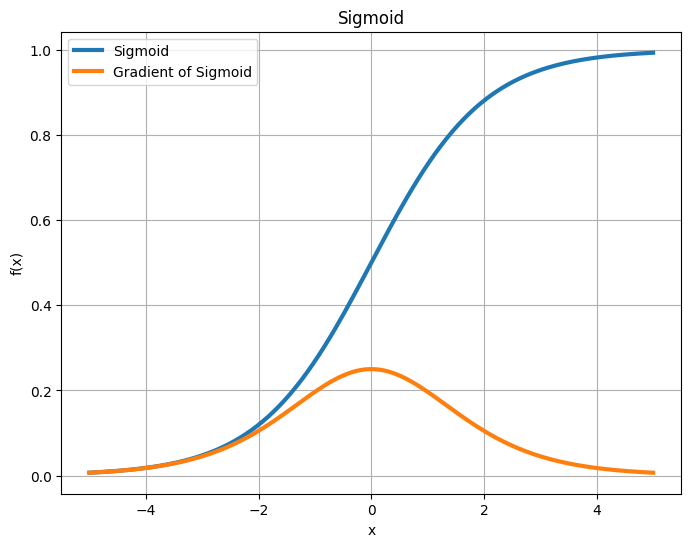

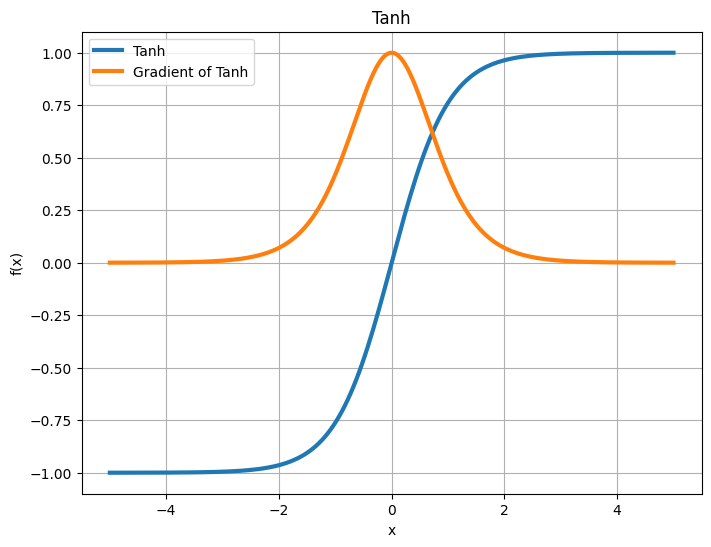

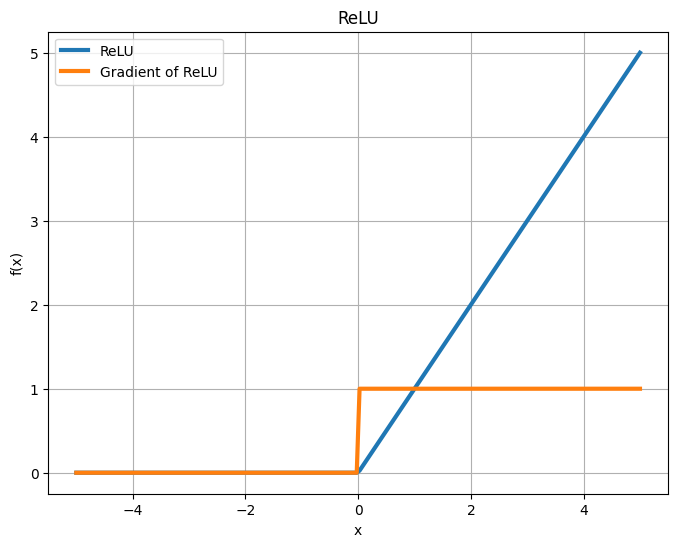

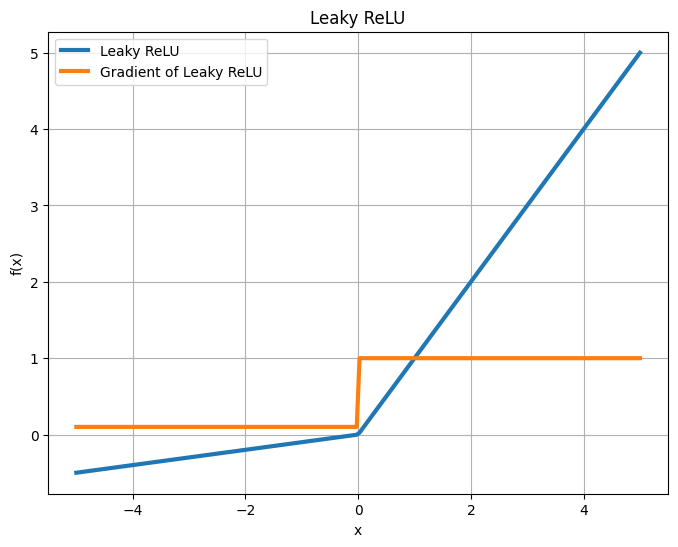

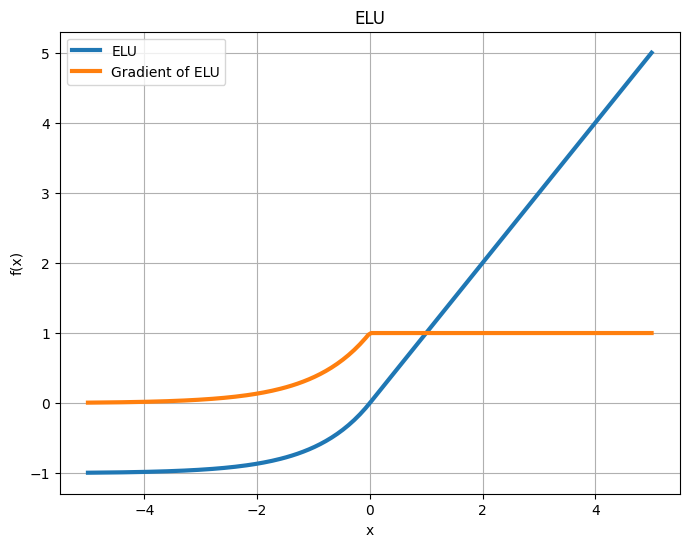

In [4]:
def vis_act_fn():
    x = torch.linspace(-5, 5, 200)
    
    for name, act in activations.items():
        plt.figure(figsize=(8, 6))
        try:
            y = act(x)
            y_grads = get_grads(act, x)
            plt.plot(x, y, linewidth=3, label=name)
            plt.plot(x, y_grads, linewidth=3, label=f"Gradient of {name}")
        except:
            plt.plot([], [], label=f"{name} (not implemented)")
        plt.title(name)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.grid(True)
        plt.show()

# Visualize the activation functions
vis_act_fn()



## 🧩 Task 3: Create the neural network

**Create a multi-layer Perceptron**: In the `NeuralNetwork` class below, the code is missing for the affine linear transformation of the input layer and the output layer . At the line `self.linear1` and `self.linear2`, replace `FILL_IN` by a linear transformation with the correct parameters. Please refer to the [PyTorch nn documentation](https://pytorch.org/docs/stable/nn.html).


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, act_fn):
        super().__init__()

        # TODO: Implement an affine linear transformation with the correct parameters
        self.linear1 = nn.Linear(num_inputs, num_hidden)

        self.act_fn = act_fn

        # TODO: Implement an affine linear transformation with the correct parameters
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x


## 🧮 Task 4: Choose and implement the appropriate loss function

Decide which loss function to use for this application. Implement the loss function from scratch in the code below.

In [6]:
def loss_function(preds, targets):
    # TODO: Implement the loss function
    loss = - (targets * torch.log(preds) + (1 - targets) * torch.log(1 - preds))
    return loss.mean()


## 🧠 Task 5: Train and evaluate the neural network on XOR dataset

Try out different activation functions and observe how they influence the performance and decision boundaries.



--- Training with Sigmoid ---


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the model: 33.60%
Test Accuracy: 33.60%


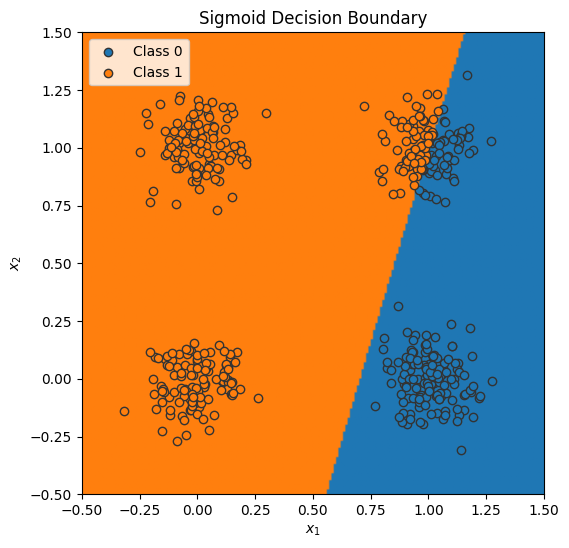


--- Training with Tanh ---


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the model: 100.00%
Test Accuracy: 100.00%


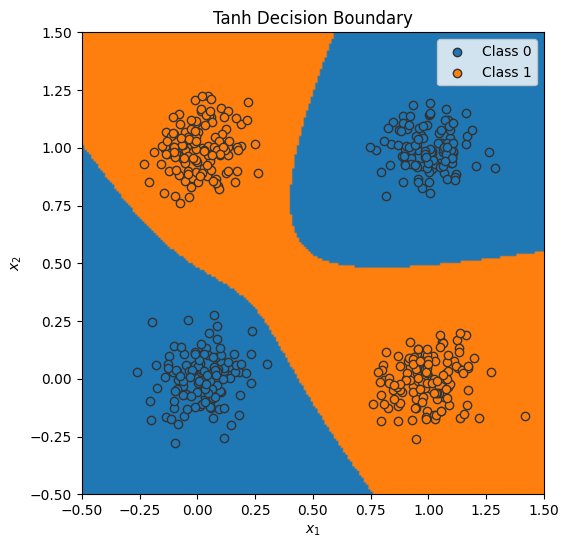


--- Training with ReLU ---


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the model: 100.00%
Test Accuracy: 100.00%


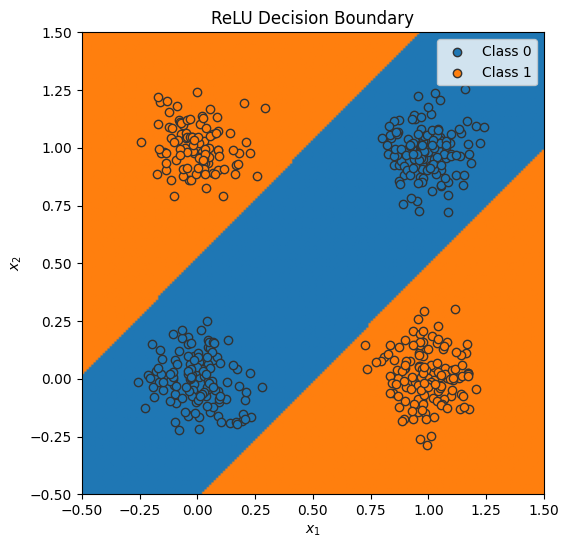


--- Training with Leaky ReLU ---


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the model: 99.80%
Test Accuracy: 99.80%


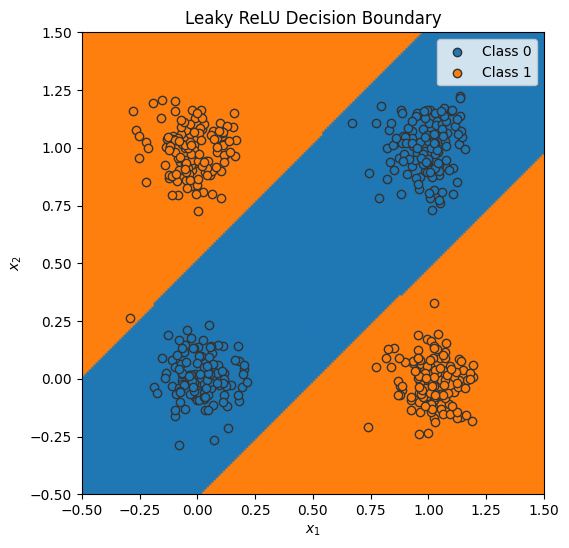


--- Training with ELU ---


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the model: 99.80%
Test Accuracy: 99.80%


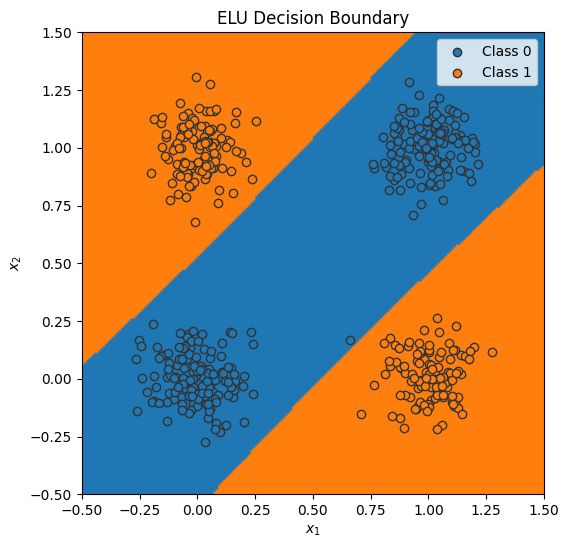

In [7]:
for name, act in activations.items():
    print(f"\n--- Training with {name} ---")
    model = NeuralNetwork(2, 4, 1, act_fn=act).to(device)
    loss_module =  loss_wrapper(loss_function)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    # Training dataset
    train_dataset = XORDataset(size=2500)
    train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
    train_model(model, optimizer, train_loader, loss_module, device)

    # Test dataset
    test_dataset = XORDataset(size=500)
    test_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False)
    predictions, accuracy = eval_model(model, test_loader, device)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    _ = visualize_boundary(model, test_dataset.data, predictions, device, f"{name} Decision Boundary")
    plt.show()



## 💭 Summary & Reflection

After completing this exercise, you should be able to:

- Understand why **non-linear activation functions** are essential in neural networks.
- See how **different activation functions** affect model learning and decision boundaries.
- Implement and visualize activation functions from their mathematical formulas.

**Discussion:**  
Which activation function worked best for the XOR problem? Why do you think that is?
